# SVC (Support Vector Classifier)

* **Explanation**: An SVM classifier with a flexible kernel.
* **Advantages**: SVC is well-suited for complex decision boundaries and can use various kernel functions to model a wide range of data structures.
* **Disadvantages**: SVC is prone to overfitting with large datasets, and selecting the right combination of kernel and hyperparameters can be challenging.
* **Important Parameters**:
  * C: The penalty parameter for misclassifications. A higher value of C means a stronger penalty, resulting in a tighter decision boundary.
  * kernel: The kernel to be used. The most common options are 'linear', 'poly', 'rbf' (Radial Basis Function), and 'sigmoid'.
  * gamma: The kernel parameter for 'rbf', 'poly', and 'sigmoid'. A higher value of gamma means a tighter decision boundary.


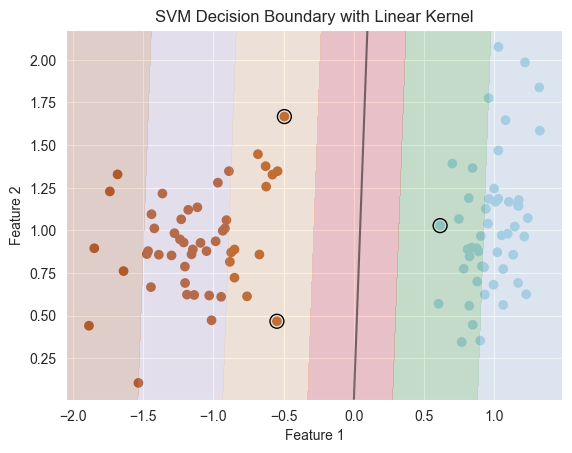

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate some example data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                            n_informative=2, random_state=1, n_clusters_per_class=1)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.Paired, alpha=0.2)
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()


# NuSVM
## (Support Vector Classifier with a Nu--Parameter)

* **Explanation**: An SVM classifier that uses a flexible kernel and a Nu-parameter to control the number of support vectors and hence the complexity of the model.
* **Advantages**: NuSVC is an effective method for controlling model complexity and can be used for non-linear decision boundaries.
* **Disadvantages**: Selecting the appropriate Nu-parameter can be challenging, and the use of kernels can lead to overfitting.
* **Important Parameters**:
  * nu: The parameter that specifies the maximum percentage of training data allowed to be support vectors. A higher value of nu allows more support vectors and results in a more complex decision boundary.
  * kernel: The kernel to be used. The most common options are 'linear', 'poly', 'rbf' (Radial Basis Function), and 'sigmoid'.
  * gamma: The kernel parameter for 'rbf', 'poly', and 'sigmoid'. A higher value of gamma means a tighter decision boundary.


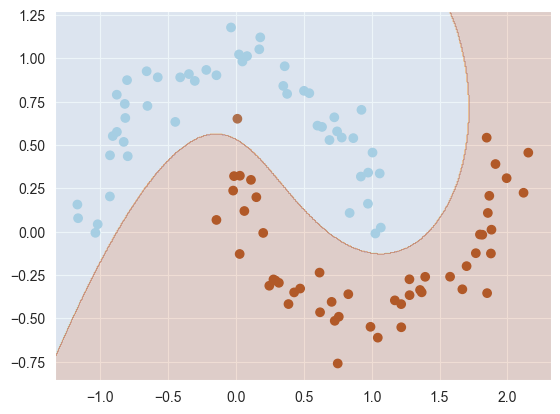

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import NuSVC

# Generate some example data
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

# Train a NuSVM classifier
clf = NuSVC(kernel='rbf', nu=0.1, gamma=0.1)
clf.fit(X, y)

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()


# LinearSVC
## Linear Support Vector Classifier

* **Explanation**: An SVM classifier that uses only a linear kernel and introduces a trade-off parameter between the width of the decision boundary and the number of misclassified data points.
* **Advantages**: LinearSVC is fast and efficient for large datasets because it uses only a linear kernel and has fewer hyperparameters compared to other SVMs.
* **Disadvantages**: LinearSVC is limited to linear decision boundaries and is not suitable for more complex decision boundaries.
* **Important Parameters**:
  * C: The penalty parameter for misclassifications. A higher value of C means a stronger penalty, resulting in a tighter decision boundary.
  * penalty: The type of penalty to be applied. The most common options are 'l1' and 'l2'.
  * loss: The loss function to be minimized. The most common options are 'hinge' and 'squared_hinge'.
  * dual: If True, the dual formulation of the problem is solved, which is faster than the primal formulation but only works when the number of samples is less than the number of features.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


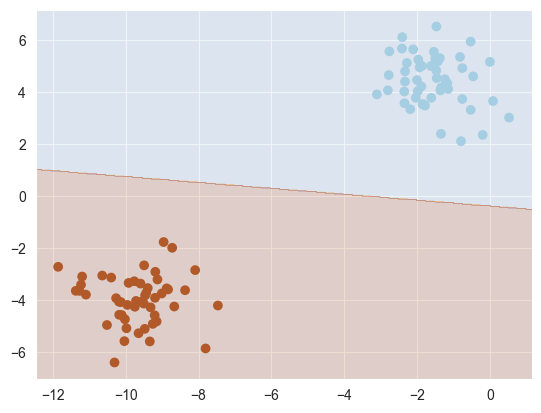

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

# Generate some example data
X, y = make_blobs(n_samples=100, centers=2, random_state=1)

# Train a LinearSVM classifier
clf = LinearSVC(C=100)
clf.fit(X, y)

# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                     np.linspace(ylim[0], ylim[1], 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary and margins
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.show()


# SVM Classification with Hyperparameter Tuning and Cross-Validation

This code demonstrates how to perform classification using a Support Vector Machine (SVM) on the Iris dataset. It includes steps for loading the data, splitting it into training and testing sets, performing cross-validation, hyperparameter tuning, and visualizing the decision boundary.

## Steps

### 1. Load the Data
The Iris dataset, which contains measurements of iris flowers from three different species, is loaded. For simplicity, only the first two features (sepal length and sepal width) are used.

### 2. Split the Data
The dataset is split into training and testing sets, with 70% of the data allocated for training and 30% for testing. This helps in evaluating the model's performance on unseen data.

### 3. Define the SVM Model
An SVM model with a linear kernel is defined. The linear kernel is chosen for its simplicity and efficiency, especially for linearly separable data.

### 4. Perform Cross-Validation
Cross-validation is performed on the training data to evaluate the model's performance. This involves splitting the training data into several folds, training the model on some folds and validating it on the remaining fold. The process is repeated multiple times, and the results are averaged to provide a more reliable estimate of the model's performance.

### 5. Hyperparameter Tuning with GridSearchCV
A grid search with cross-validation is conducted to find the best hyperparameters for the SVM model. The hyperparameters being tuned include:
- **C**: The penalty parameter for misclassifications, controlling the trade-off between achieving a low error on the training data and minimizing the norm of the weights.
- **kernel**: The kernel type to be used ('linear', 'rbf', 'poly').
- **degree**: The degree of the polynomial kernel, relevant only if the polynomial kernel is used.
- **gamma**: The kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels, which defines the influence of individual data points.

The grid search tests various combinations of these hyperparameters to determine which set produces the best model performance based on cross-validation scores.

### 6. Plot the Decision Boundary
The decision boundary of the SVM model, using the best hyperparameters identified from the grid search, is plotted. This visualization shows how the model separates the different classes in the dataset. The plot includes the decision regions and the data points, making it easy to see how well the model distinguishes between the species of iris flowers.

## Summary
This code provides a complete workflow for training and evaluating an SVM model on the Iris dataset. It demonstrates the importance of cross-validation for reliable model evaluation and hyperparameter tuning to optimize model performance. The final visualization of the decision boundary helps to understand the classifier's effectiveness in separating the different classes.



In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC

#load the data 
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Define the SVM model
svm_model = SVC(kernel='linear')

# Perform Cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

#Print the cv_sores

print(f'Cross validation score: {cv_scores}')
print(f"Mean cross-validation score: {np.mean(cv_scores)}")

# Hyperparameter grid 
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameter and scores
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross validation score: {grid_search.best_score_}")

#plot decision boundary

def decision_boundary(X, y, model):
    h = 0.2 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with the best parameters')
    plt.show()



Cross validation score: [0.9047619  0.71428571 0.76190476 0.95238095 0.76190476]
Mean cross-validation score: 0.819047619047619
Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross validation score: 0.819047619047619
